In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
dataset = pd.read_csv('new_appdata10.csv')

# Data Preprocessing

In [3]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [4]:
response = dataset["enrolled"]
dataset = dataset.drop(columns = 'enrolled')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

In [7]:
X_train

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,SavingsCount,CMCount,CCCount,LoansCount
20330,315793,2,20,32,5,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,10,0,2,1,2
34807,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,10,0,0,0,1
31888,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,312924,5,23,19,6,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
45891,291893,0,15,22,4,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
42613,221546,3,6,25,43,0,0,0,0,1,...,0,0,0,0,0,4,6,0,0,0
43567,116320,4,13,27,4,1,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0


In [8]:
y_train

20330    0
17532    0
45819    0
34807    0
31888    1
        ..
21243    0
45891    0
42613    0
43567    0
2732     1
Name: enrolled, Length: 40000, dtype: int64

In [9]:
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')

In [10]:
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc_X = StandardScaler()

In [13]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [14]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [15]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [16]:
X_train = X_train2
X_test = X_test2

# Model Building

In [17]:
from sklearn.linear_model import LogisticRegression

In [20]:
classifier = LogisticRegression(random_state=0, penalty='l2')

In [21]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [24]:
cm = confusion_matrix(y_test, y_pred)

In [26]:
accuracy_score(y_test, y_pred)

0.7679

In [27]:
precision_score(y_test, y_pred)

0.760856513908345

In [28]:
recall_score(y_test, y_pred)

0.7715097402597403

In [29]:
f1_score(y_test, y_pred)

0.7661460957178842

In [30]:
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))

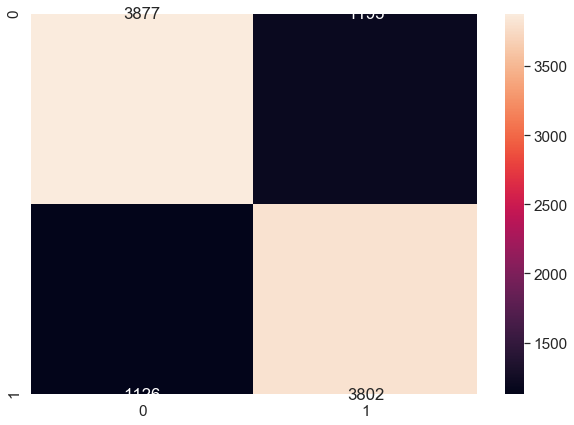

In [32]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [33]:
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.7679


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [42]:
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.009)


# Formatting the final Results

In [43]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [44]:
final_results['predicted_results'] = y_pred

In [45]:
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
